2019-May-26, Sunday

Calculates distribution of any given sequence of numbers.

In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import collections

In [2]:
def CalculateDistr(KiskaDistr):
    NumCount = collections.Counter(KiskaDistr) #Value and corresponding count.
    count_dict = {} #This will contain all values and their corresponding counts, including all missing values.
    
    k_max = max(KiskaDistr)
    
    for k in range(0, k_max+1): count_dict[k] = 0 #initialize all to zero

    for k, cnt in NumCount.items(): count_dict[k] = cnt
    
    k_list = list(count_dict.keys()) #list of degrees
    cnt_list = list(count_dict.values()) #list of counts
    pk_list = np.array(cnt_list)/sum(count_dict.values()) #normalized count
    
    #Cumulative counts:
    cumul_cnt_list = np.zeros_like(cnt_list)
    for k in k_list: cumul_cnt_list[k] = sum(cnt_list[k:])

    ck_list = cumul_cnt_list/sum(count_dict.values()) #normalized cumulative count

    pk_dict = {'k': k_list, 'cnt': cnt_list, 'pk': pk_list, 'cumul_cnt': cumul_cnt_list, "ck": ck_list}
    pk_df = pd.DataFrame(data=pk_dict, columns=['k', 'cnt', 'pk', 'cumul_cnt', 'ck'])
    
    return (pk_df)

In [3]:
G = nx.watts_strogatz_graph(2000, 4, 0.5)

In [4]:
SeqOfNums = [deg for node, deg in G.degree()]

In [5]:
pk_df = CalculateDistr(SeqOfNums)

In [6]:
pk_df

,k,cnt,pk,cumul_cnt,ck
0,0,0,0.0000,2000,1.0000
1,1,0,0.0000,2000,1.0000
2,2,178,0.0890,2000,1.0000
3,3,554,0.2770,1822,0.9110
4,4,632,0.3160,1268,0.6340
5,5,430,0.2150,636,0.3180
6,6,152,0.0760,206,0.1030
7,7,45,0.0225,54,0.0270
8,8,6,0.0030,9,0.0045
9,9,1,0.0005,3,0.0015


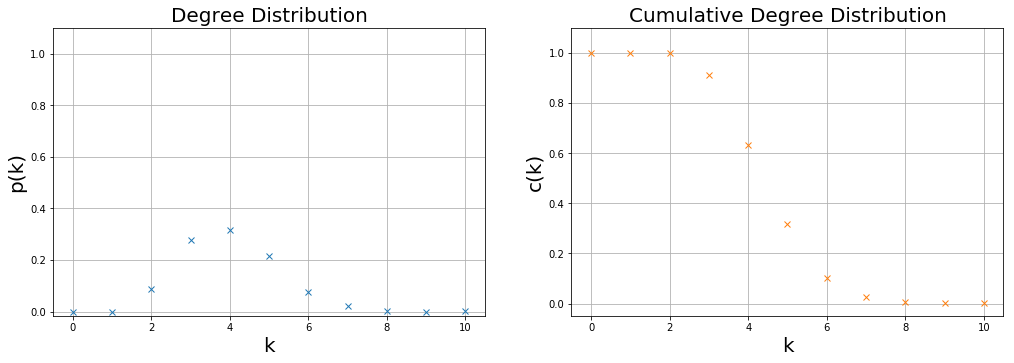

In [7]:
fig = plt.figure()
ax1 = fig.add_axes([0, 0, 1, 1])
ax2 = fig.add_axes([1.2, 0, 1, 1])

ax1.plot(pk_df["k"], pk_df["pk"], "C0x")
ax2.plot(pk_df["k"], pk_df["ck"], "C1x")


for ax in [ax1, ax2]:
    ax.set_xlabel("k", fontsize=20)
    ax.set_ylim(top=1.1)
    ax.grid()

ax1.set_ylabel("p(k)", fontsize=20)
ax1.set_title("Degree Distribution", fontsize=20)

ax2.set_ylabel("c(k)", fontsize=20)
ax2.set_title("Cumulative Degree Distribution", fontsize=20)

plt.show()

---

In [8]:
G2 = nx.erdos_renyi_graph(2000, 0.05)

In [9]:
SeqOfNums_2 = [deg for node, deg in G2.degree()]

In [10]:
pk_df_2 = CalculateDistr(SeqOfNums_2)

In [11]:
pk_df_2

,k,cnt,pk,cumul_cnt,ck
0,0,0,0.0000,2000,1.0000
1,1,0,0.0000,2000,1.0000
2,2,0,0.0000,2000,1.0000
3,3,0,0.0000,2000,1.0000
4,4,0,0.0000,2000,1.0000
5,5,0,0.0000,2000,1.0000
6,6,0,0.0000,2000,1.0000
7,7,0,0.0000,2000,1.0000
8,8,0,0.0000,2000,1.0000
9,9,0,0.0000,2000,1.0000


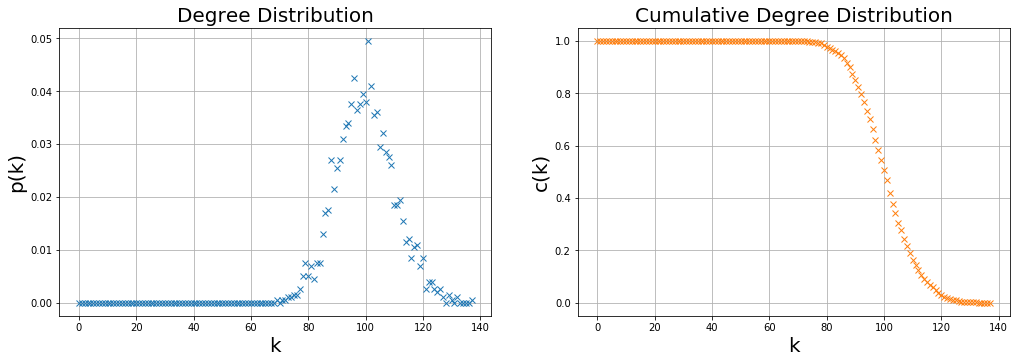

In [12]:
fig = plt.figure()
ax1 = fig.add_axes([0, 0, 1, 1])
ax2 = fig.add_axes([1.2, 0, 1, 1])

ax1.plot(pk_df_2["k"], pk_df_2["pk"], "C0x")
ax2.plot(pk_df_2["k"], pk_df_2["ck"], "C1x")


for ax in [ax1, ax2]:
    ax.set_xlabel("k", fontsize=20)
    ax.grid()

ax1.set_ylabel("p(k)", fontsize=20)
ax1.set_title("Degree Distribution", fontsize=20)

ax2.set_ylabel("c(k)", fontsize=20)
ax2.set_title("Cumulative Degree Distribution", fontsize=20)

plt.show()